In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
file='/shared/obs/gridded/OISSTv2/monthly/sst.mnmean.nc'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 461)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [3]:
ds_seas=ds.groupby('time.season').mean()
ds_seas

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, season: 4)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.7899978 -1.7899978 ... -1.7899979

Text(0.5, 0.98, 'SST (degC)')

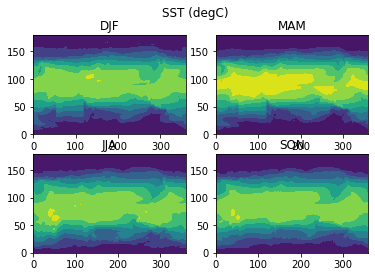

In [8]:
plt.subplot(2,2,1)
plt.contourf(ds_seas['sst'].sel(season='DJF'))
plt.title('DJF')

plt.subplot(2,2,2)
plt.contourf(ds_seas['sst'].sel(season='MAM'))
plt.title('MAM')

plt.subplot(2,2,3)
plt.contourf(ds_seas['sst'].sel(season='JJA'))
plt.title('JJA')

plt.subplot(2,2,4)
plt.contourf(ds_seas['sst'].sel(season='SON'))
plt.title('SON')

plt.suptitle('SST (degC)')

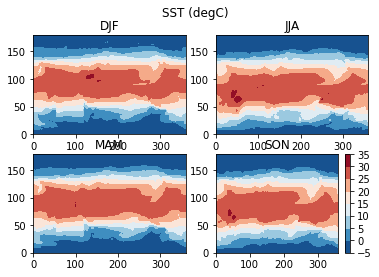

In [12]:
clevs=np.arange(-5,36,5)
for i,seas in enumerate(ds_seas['season']):
    #print(seas,i)
    plt.subplot(2,2,i+1)
    plt.contourf(ds_seas['sst'].sel(season=seas),levels=clevs,
                cmap='RdBu_r')
    plt.title(seas.values)
plt.suptitle('SST (degC)')
plt.colorbar()

Text(0.5, 0.98, 'Sea Surface Temperature')

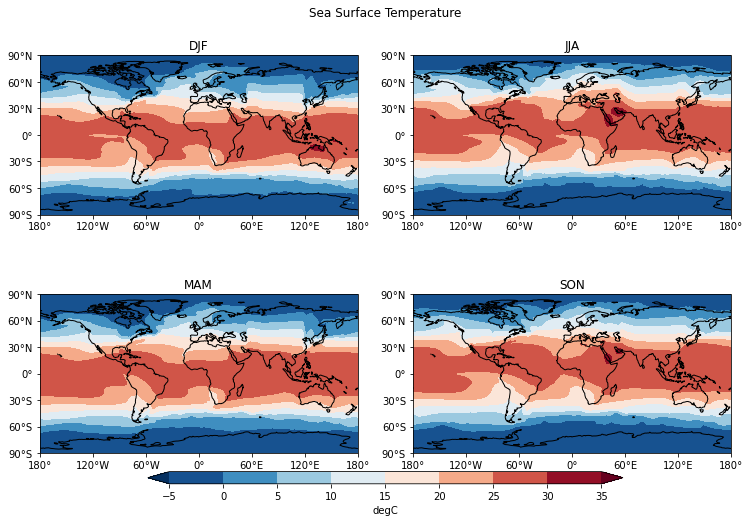

In [19]:
fig,axs=plt.subplots(nrows=2,ncols=2,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11,8.5))
axs=axs.flatten()

for i,seas in enumerate(ds_seas['season']):
    
    data=ds_seas['sst'].sel(season=seas)
    cs=axs[i].contourf(ds_seas['lon'],ds_seas['lat'],
                      data,clevs,
                      transform=ccrs.PlateCarree(),
                      cmap='RdBu_r',extend='both')
    
    # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    
    # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    
    axs[i].coastlines()
    axs[i].set_title(seas.values)

# Make room for colorbar
fig.subplots_adjust(bottom=0.25,top=0.9,left=0.05,right=0.95,
                  wspace=0.1,hspace=0.5)

cbar_ax=fig.add_axes([0.2,0.2,0.6,0.02])
cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='degC')

plt.suptitle('Sea Surface Temperature')

## Faceting 

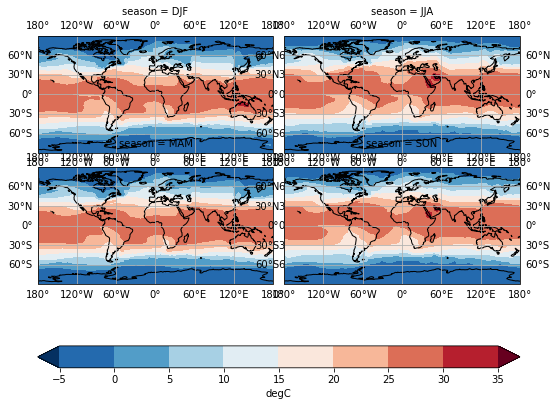

In [26]:
fg=ds_seas['sst'].plot.contourf(
            levels=clevs,
            row='season',
            col_wrap=2,
            cmap='RdBu_r',
            extend='both',
            subplot_kws={'projection':ccrs.PlateCarree()},
            cbar_kwargs={
                'orientation':'horizontal',
                'label':'degC'
            })

for ax in fg.axes.flat:
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Longitude labels
#    ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
#    lon_formatter=cticker.LongitudeFormatter()
#    ax.xaxis.set_major_formatter(lon_formatter)
    
    # Latitude labels
#    ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
#    lat_formatter=cticker.LatitudeFormatter()
#    ax.yaxis.set_major_formatter(lat_formatter)

In [27]:
import hvplot.xarray

In [28]:
ds['sst'][0,:,:].hvplot()

:Image   [lon,lat]   (sst)

In [31]:
ds['sst'].hvplot(groupby='time',width=600,widget_type='scrubber',widget_location='bottom')

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=460, width=550)
        [2] HSpacer()